In [1]:
library(ggplot2)
library(plyr)
library(dplyr)
library(data.table)
library(tidyr)
library(tidyverse)
library(ggplot2)
library(ggsignif) 
library(ggpubr) 
library(reshape2)
library(ggsci) 
library(stringr)
library(ggvenn)
library(ggpubr)

options(repr.matrix.max.rows=600, repr.matrix.max.cols=200) 
options(repr.plot.width = 6, repr.plot.height = 6)


载入程辑包：'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



载入程辑包：'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.4
v lubridate 1.9.2     v stringr   1.5.0
v purrr     1.0.1     v tibble    3.2.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::arrange()      masks plyr::arrange()
x data.table::between() masks dplyr::between()
x purrr::compact()      masks plyr::compact()
x dplyr::count()        masks plyr::count()
x dplyr::desc()         masks plyr::desc()
x dplyr::failwith()     masks plyr::failwith()
x dplyr::filte

In [2]:
db<-fread("all3up_clone-pass_germ-pass_mutation-pass_selected_rows.tsv")%>%as.data.frame()

# add group infor

In [3]:
#IG类型比较
mypal <- ggsci::pal_npg(palette ="nrc", alpha = 0.7)(10)
mypal2<-ggsci::pal_jama(palette ="default", alpha = 0.7)(6)
mypal3<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.7)(9)
mypal4 <- ggsci::pal_npg(palette ="nrc", alpha = 0.5)(10)
mypal5<-ggsci::pal_jama(palette ="default", alpha = 0.5)(6)
mypal6<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.5)(9)
mypal7 <- ggsci::pal_npg(palette ="nrc", alpha = 0.3)(10)
mypal8<-ggsci::pal_jama(palette ="default", alpha = 1)(6)
mypal9<-ggsci::pal_lancet(palette ="lanonc", alpha = 1)(9)

mypal<-c(mypal3,mypal2,mypal,mypal6,mypal5,mypal4,mypal9,mypal8,mypal7)

mypal[3]<-"#FFBD7A"

### 读取TNL shared clone

In [5]:
Patients_clone_overlap_TNL<-fread("Fig5A-D.Patients_clone_overlap_TNL.csv") %>% as.data.frame()

## Fig5D

In [7]:
write.csv(Patients_clone_overlap_TNL_long,"Fig5D.csv",quote=FALSE,row.names=FALSE)

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4."
Warning message in wilcox.test.default(c(0.0333780815230657, 0.131722525331255, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0.0333780815230657, 0.131722525331255, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0.124783051050332, 0.543849526886684, 0.121272365805169, :
"cannot compute exact p-value with ties"


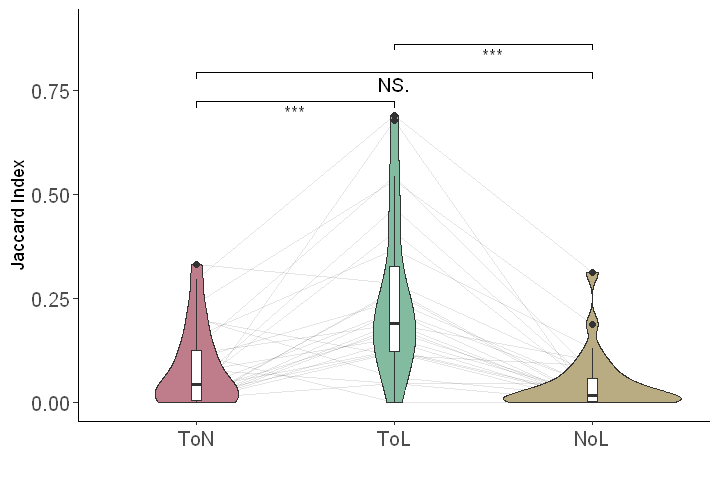

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --  0.9

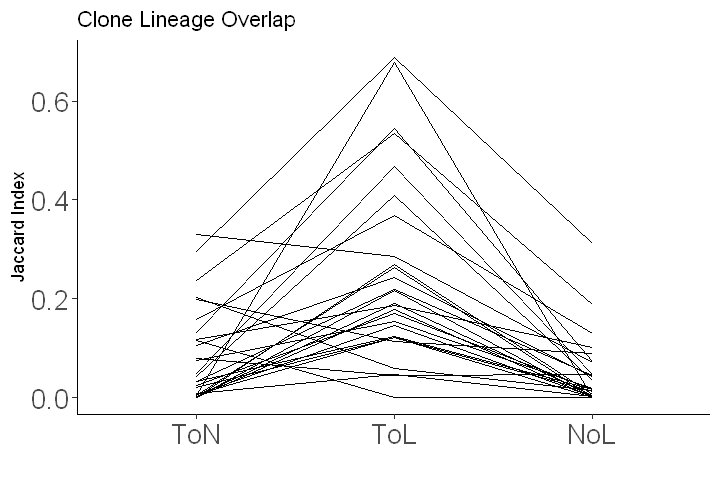

In [6]:
options(repr.plot.width = 6, repr.plot.height = 4)
Patients_clone_overlap_TNL_long<-melt(Patients_clone_overlap_TNL, id.vars = c("patient"))
#pdf("overlap_TNL.pdf",4,4)
Clone_TNL_jac<-ggplot(Patients_clone_overlap_TNL_long,aes(x=variable,y=value,fill=variable))+geom_line(aes(group=patient),stat="identity",alpha=.1)+
    geom_violin()+
    geom_boxplot(fill="white",width=.05)+
    geom_signif(comparisons = list(c("ToN", "ToL"),c("ToN", "NoL"),c("ToL","NoL")),
              map_signif_level=T,
              textsize=4,test=wilcox.test,step_increase=0.1,vjust=1.5,tip_length=0.02)+
    scale_fill_manual(values=c("#BF7C8B","#83BBA1","#B9AB82"))+
    theme_classic()+
#    theme(panel.border = element_rect(fill=NA,color="black",size=0.5,linetype="solid"))+
    theme(axis.text =element_text(size=12))+
    xlab("")+ylab("Jaccard Index")+labs(fill="Shared Type")+guides(fill=FALSE)+
    ylim(0,0.9)
    Clone_TNL_jac
#dev.off()

ggplot(Patients_clone_overlap_TNL_long,aes(x=variable,y=value,group=patient)) + geom_line(stat="identity")+
    theme_classic()+
    #theme(panel.border = element_rect(fill=NA,color="black",size=0.5,linetype="solid"))+
    theme(axis.text =element_text(size=16))+
    xlab("")+ylab("Jaccard Index")+ggtitle("Clone Lineage Overlap")
    ylim(0,0.9)
#dev.off()


### Fig5D.TNL_clone_overlap.pdf

In [9]:
pdf("Fig5D.TNL_clone_overlap.pdf",4,3)
Clone_TNL_jac
dev.off()

Warning message in wilcox.test.default(c(0.0333780815230657, 0.131722525331255, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0.0333780815230657, 0.131722525331255, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0.124783051050332, 0.543849526886684, 0.121272365805169, :
"cannot compute exact p-value with ties"


png 
  2

#### 2.3.4 【***】读取添加flag后的jaccard表格

In [9]:
jac_long<-fread("Fig5A-D.sample_seq_overlap_addflag.csv") %>% as.data.frame()

#### 2.3.5 筛选每个病人自身样本的jaccard

In [10]:
jac_long_self<-jac_long[-grep("between",jac_long$flag),]

### 计算self不同组织类型间overlap程度

In [11]:
jac_long$flag<-gsub(jac_long$flag,pattern="between",replacement = "Inter")
jac_long$flag<-gsub(jac_long$flag,pattern="self",replacement = "Intra")

## Fig5C

In [12]:
library("ggsignif")
options(repr.plot.width = 6, repr.plot.height = 4)

data1<-jac_long

data1$flag<-gsub(data1$flag,pattern = "LoT",replacement = "ToL")
data1$flag<-gsub(data1$flag,pattern = "LoN",replacement = "NoL")
data1$flag<-gsub(data1$flag,pattern = "NoT",replacement = "ToN")

data1$flag<-factor(data1$flag,levels=c("Intra.ToT","Intra.ToN","Intra.ToL","Intra.LoL","Intra.NoL"))

intra_jac<-ggplot(data1[grep("Intra",data1$flag),],aes(x=flag,y=jaccard_index))+
  geom_violin(aes(x=flag,y=jaccard_index,fill=flag),width=1.5)+
  geom_boxplot(aes(x=flag,y=jaccard_index),width=.1,outlier.size = .01,)+
  geom_signif(comparisons = list(c("Intra.ToT","Intra.ToN"),
                                c("Intra.ToT","Intra.ToL"),
                                c("Intra.ToL","Intra.ToN"),
                                c("Intra.LoL","Intra.ToN"),
                                c("Intra.ToN","Intra.NoL"),
                                c("Intra.LoL","Intra.ToL"),
                                c("Intra.ToL","Intra.NoL")),
              map_signif_level=T,
              textsize=4,test=wilcox.test,step_increase=0.1,vjust=1.5,tip_length=0.02)+
  theme_classic2()+
    #theme(panel.border = element_rect(fill=NA,color="black",size=0.5,linetype="solid"))+
        xlab("")+ylab("Jaccard Index")+
    theme(axis.text =element_text(size=12),
      axis.text.x =element_text(angle=90,size=12))+
    scale_fill_manual(values=mypal5)+
    guides(fill=FALSE)#+
    #ylim(0,0.8)


In [14]:
write.csv(data1[grep("Intra",data1$flag),],"Fig5C.csv",quote=FALSE,row.names=FALSE)

Warning message:
"`position_dodge()` requires non-overlapping x intervals"


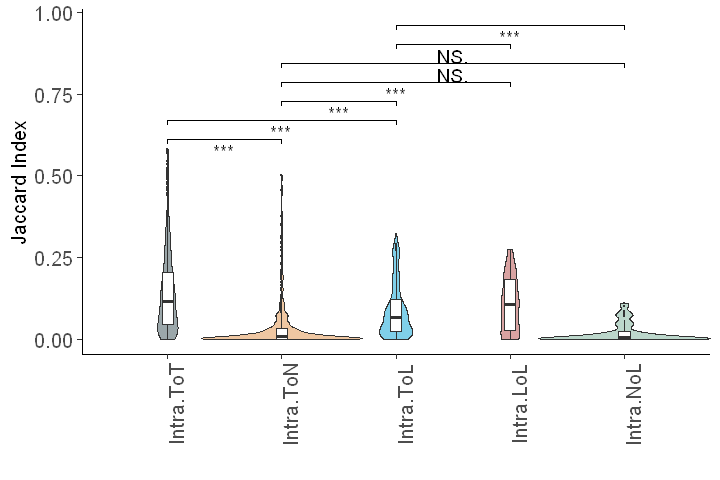

In [19]:
intra_jac

pdf("Fig5C.Intra_jac_boxplot.pdf",4,2)
intra_jac
dev.off()

## Fig5AB

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 418352 rows containing non-finite values (`stat_ydensity()`)."
Warning message:
"Removed 418352 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 418352 rows containing non-finite values (`stat_signif()`)."


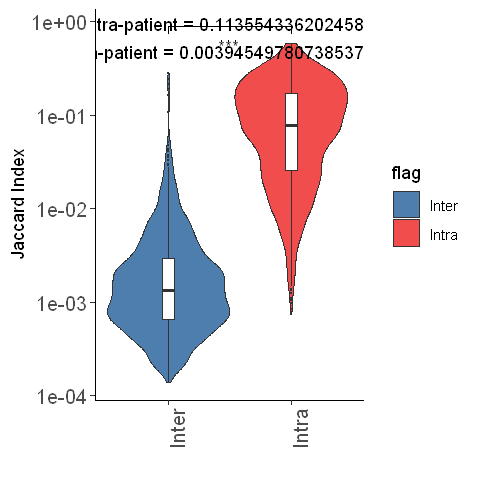

In [15]:
options(repr.plot.width = 4, repr.plot.height = 4)

data1<-jac_long

data1<-data1[-grep("same",data1$flag),]
data1$flag[grep("Intra",data1$flag)]<-"Intra"
data1$flag[grep("Inter",data1$flag)]<-"Inter"

# mean(data1$jaccard_index[data1$jaccard_index>0 & data1$flag=="Intra"])
# mean(data1$jaccard_index[data1$jaccard_index>0 & data1$flag=="Inter"])
m1<-paste0("Average Intra-patient = ",mean(data1$jaccard_index[data1$jaccard_index>0 & data1$flag=="Intra"]))
m2<-paste0("Average Intra-patient = ",mean(data1$jaccard_index[data1$jaccard_index>0 & data1$flag=="Inter"]))


inter_intra_boxplot<-ggplot(data1,aes(x=flag,y=jaccard_index))+
  geom_violin(aes(x=flag,y=jaccard_index,fill=flag),width=1)+
  geom_boxplot(aes(x=flag,y=jaccard_index),width=.1,outlier.size = .1)+
  geom_signif(comparisons = list(c("Intra","Inter")),
              map_signif_level=T,
              textsize=4,test=wilcox.test,step_increase=0.1,vjust=2,tip_length=0.02)+
    theme_classic()+
    annotate("text",x=Inf,y=Inf,vjust=c(1.5,3.5),hjust=c(1,1),label=c(m1,m2))+
    #theme(panel.border = element_rect(fill=NA,color="black",size=0.5,linetype="solid"))+
    xlab("")+ylab("Jaccard Index")+
    scale_y_log10()+
    theme(axis.text =element_text(size=12),
    axis.text.x =element_text(angle=90,size=12))+
    scale_fill_manual(values=mypal)

inter_intra_boxplot

In [16]:
write.csv(data1,"Fig5A.csv",quote=FALSE,row.names=FALSE)

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


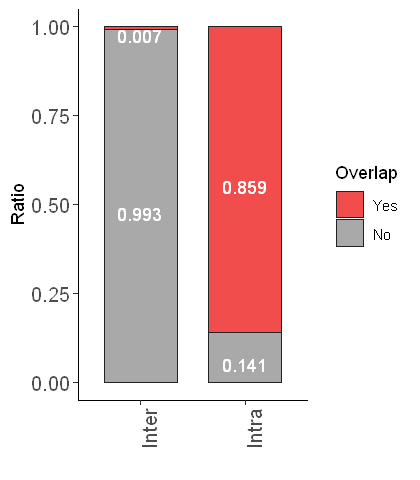

In [17]:
options(repr.plot.width = 3.5, repr.plot.height = 4)
data1<-jac_long

data1<-data1[-grep("same",data1$flag),]
data1$flag[grep("Intra",data1$flag)]<-"Intra"
data1$flag[grep("Inter",data1$flag)]<-"Inter"

data1$overlap=""
data1$overlap[data1$jaccard_index>0]<-"Yes"
data1$overlap[data1$jaccard_index==0]<-"No"

#IG类型比较

Cellratio<-prop.table(table(data1$flag,data1$overlap),margin=1)
Cellratio<- as.data.frame(Cellratio)
colnames(Cellratio)<-c("Flag","Overlap","Freq")
Cellratio$Overlap<-factor(Cellratio$Overlap,levels=c("Yes","No"))

Cellratio$label=round(Cellratio$Freq,digits=3)

ce<-ddply(Cellratio,"Flag",transform,label_y=cumsum(Freq)-0.5*Freq)


inter_intra_barplot<-ggplot(ce,aes(x=Flag,y=Freq,fill=Overlap))+
    geom_bar(aes(x=Flag,y=Freq,fill=Overlap),stat="identity",width=0.7,size=0.5,colour="#222222")+
    theme_classic()+
    labs(x='',y='Ratio')+
    scale_fill_manual(values=c("#ED0000B2","darkgrey"))+
    geom_text(aes(label = label,y=label_y),colour="white",vjust=1)+
#    theme(panel.border = element_rect(fill=NA,color="black",size=0.5,linetype="solid"))+
    theme(axis.text =element_text(size=12),
      axis.text.x =element_text(angle=90,size=12))

inter_intra_barplot

In [19]:
write.csv(ce,"Fig5B.csv",quote=FALSE,row.names=FALSE)

In [38]:
pdf("Fig5AB.inter_intra.row2.pdf",9,3.5)
intra_jac+Inter_jac+plot_layout(nrow=1,width=c(2,1))
dev.off()

Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 255972 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 255972 rows containing non-finite values (stat_boxplot)."
Warning message:
"Removed 255972 rows containing non-finite values (stat_signif)."
Warning message:
"position_dodge requires non-overlapping x intervals"


png 
  2